In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [2]:
Y = data[assets].pct_change().dropna()

display(Y.head())


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,-0.0900%,-2.8287%,-2.5688%,-2.5585%,-0.9612%,-0.4902%,-1.6936%,-0.2491%,-2.0271%,-0.3136%,...,0.0512%,-0.5063%,-1.3444%,-3.4977%,-0.1744%,1.2946%,-2.1854%,-1.2140%,-0.7573%,-2.1612%
2016-01-05,-2.0257%,0.4057%,0.4036%,1.9692%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3734%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2411%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5548%,0.0212%,0.1592%,-1.5646%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9035%,-2.9145%
2016-01-07,-5.1388%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8855%,-4.6058%,-2.5394%,...,-2.2067%,-3.0310%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7642%,-0.1649%,...,-0.1538%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%


In [3]:

import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,5.5551%,10.5178%,0.0000%,0.0000%,8.8001%,0.0000%,4.7778%,0.0000%,0.0000%,...,11.2496%,0.0000%,0.0000%,0.0000%,0.0000%,7.9788%,0.0000%,0.0000%,4.1383%,0.0000%


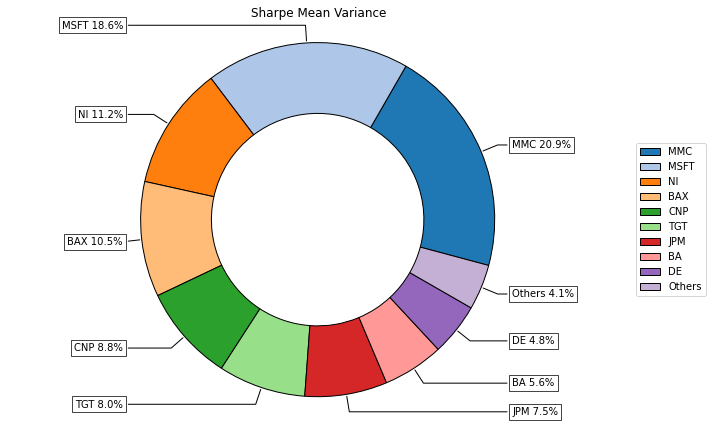

In [4]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [5]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,5.1206%,4.3334%,2.1717%,7.0667%,3.1868%,0.1850%,0.0000%,2.9728%,...,11.5763%,0.0000%,14.8984%,0.0396%,6.7156%,4.2092%,0.0000%,0.0000%,8.2637%,0.0019%
1,0.0000%,1.7914%,8.1835%,0.6778%,1.7442%,8.6959%,2.0606%,1.6005%,0.0000%,1.3086%,...,13.6967%,0.0000%,9.1544%,0.0000%,5.8689%,5.7767%,0.0000%,0.0000%,8.7102%,0.0000%
2,0.0000%,2.5433%,8.9733%,0.0000%,1.2426%,9.3156%,1.5796%,2.0330%,0.0000%,0.3715%,...,14.5510%,0.0000%,6.3250%,0.0000%,5.4186%,6.3699%,0.0000%,0.0000%,8.9550%,0.0000%
3,0.0000%,3.1111%,9.4778%,0.0000%,0.6496%,9.7657%,0.9240%,2.3124%,0.0000%,0.0000%,...,15.1335%,0.0000%,3.4855%,0.0000%,4.6374%,6.8032%,0.0000%,0.0000%,9.0775%,0.0000%
4,0.0000%,3.5683%,9.8653%,0.0000%,0.0795%,10.1250%,0.2218%,2.5164%,0.0000%,0.0000%,...,15.5460%,0.0000%,0.8877%,0.0000%,3.7857%,7.1433%,0.0000%,0.0000%,9.1219%,0.0000%


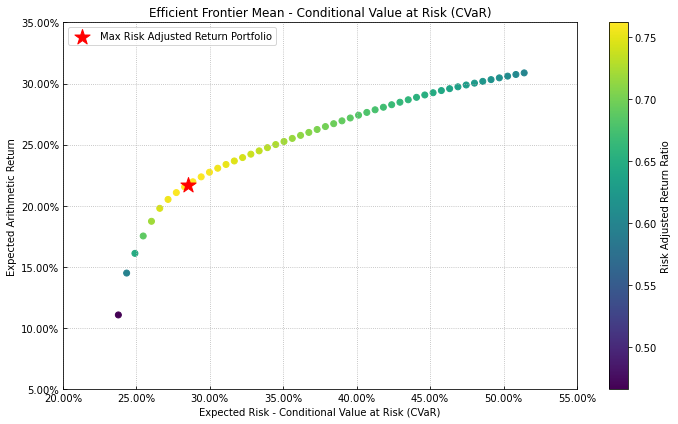

In [14]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

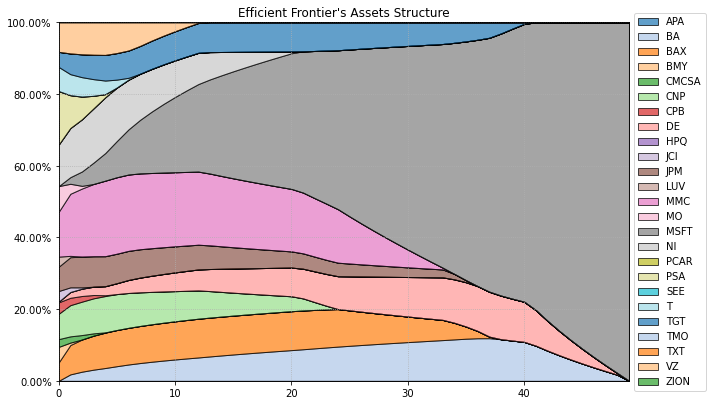

In [7]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [8]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,10.5263%,0.0000%,0.0000%,9.5562%,0.0000%,5.6184%,0.0000%,0.0000%,...,13.6312%,0.0000%,0.0000%,0.0000%,0.0000%,12.0738%,0.0000%,0.0000%,2.5631%,0.0000%


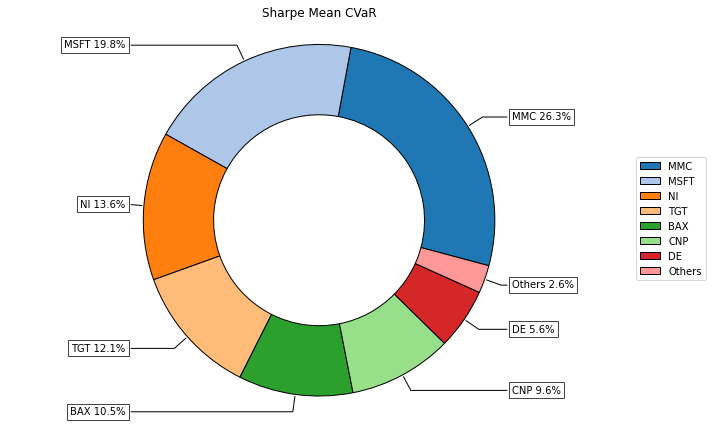

In [9]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [10]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,1.9159%,6.3900%,0.9685%,5.3993%,8.2817%,0.0000%,0.0000%,4.3431%,...,6.9353%,0.0000%,20.9063%,0.0000%,2.4965%,3.5740%,0.0000%,0.0000%,22.3451%,0.0000%
1,0.0000%,0.0000%,4.4186%,5.5569%,0.0000%,5.8846%,4.6025%,0.0000%,0.0000%,1.8609%,...,7.6561%,0.0000%,14.5802%,0.0000%,2.3200%,7.3998%,0.0000%,0.0000%,19.7579%,0.0000%
2,0.0000%,0.0000%,5.6539%,3.7584%,0.0000%,11.8250%,0.0000%,0.0000%,0.0000%,3.2694%,...,8.7828%,0.0000%,10.0737%,0.0000%,0.8991%,7.4220%,0.0000%,0.0000%,18.7084%,0.0000%
3,0.0000%,0.0000%,6.6414%,0.7161%,0.0000%,13.8893%,0.0000%,0.0000%,0.0000%,1.1398%,...,7.3290%,0.0000%,8.1824%,0.0000%,0.0000%,8.7139%,0.0000%,0.0000%,18.3554%,0.0000%
4,0.0000%,0.0000%,7.7122%,0.0000%,0.0000%,12.2654%,0.0000%,0.0000%,0.0000%,0.2526%,...,9.2917%,0.0000%,5.2030%,0.0000%,0.0000%,10.3815%,0.0000%,0.0000%,14.9668%,0.0000%


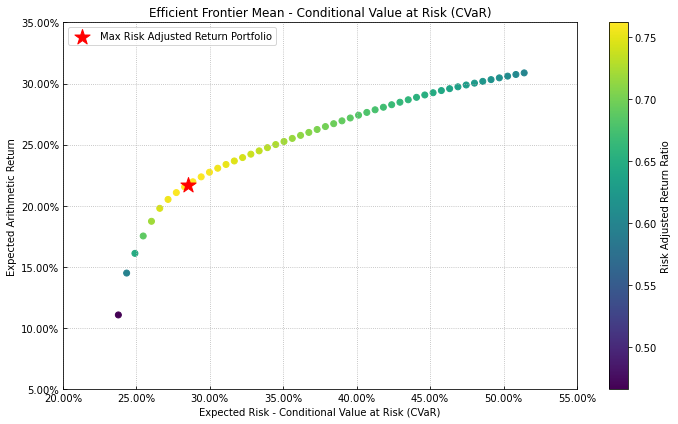

In [15]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

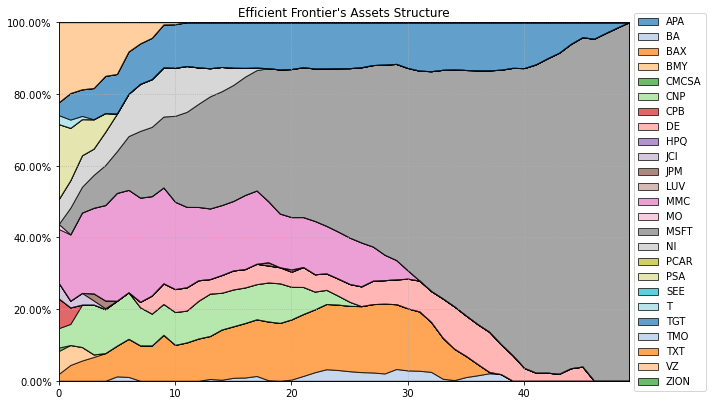

In [12]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)


In [16]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,10.5263%,0.0000%,0.0000%,9.5562%,0.0000%,5.6184%,0.0000%,0.0000%,...,13.6312%,0.0000%,0.0000%,0.0000%,0.0000%,12.0738%,0.0000%,0.0000%,2.5631%,0.0000%


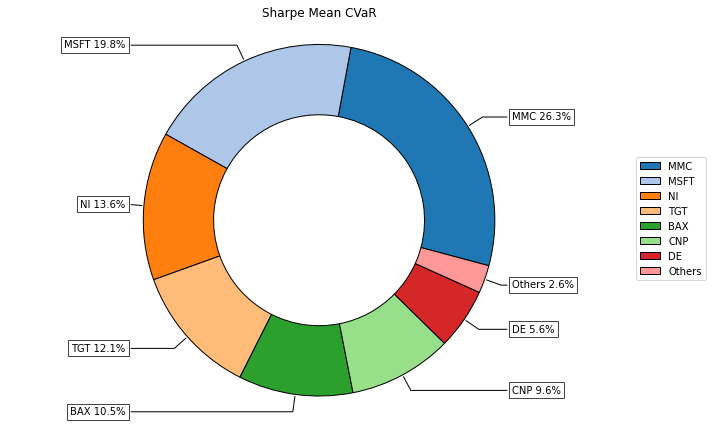

In [17]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [18]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,1.9159%,6.3900%,0.9685%,5.3993%,8.2817%,0.0000%,0.0000%,4.3431%,...,6.9353%,0.0000%,20.9063%,0.0000%,2.4965%,3.5740%,0.0000%,0.0000%,22.3451%,0.0000%
1,0.0000%,0.0000%,4.4186%,5.5569%,0.0000%,5.8846%,4.6025%,0.0000%,0.0000%,1.8609%,...,7.6561%,0.0000%,14.5802%,0.0000%,2.3200%,7.3998%,0.0000%,0.0000%,19.7579%,0.0000%
2,0.0000%,0.0000%,5.6539%,3.7584%,0.0000%,11.8250%,0.0000%,0.0000%,0.0000%,3.2694%,...,8.7828%,0.0000%,10.0737%,0.0000%,0.8991%,7.4220%,0.0000%,0.0000%,18.7084%,0.0000%
3,0.0000%,0.0000%,6.6414%,0.7161%,0.0000%,13.8893%,0.0000%,0.0000%,0.0000%,1.1398%,...,7.3290%,0.0000%,8.1824%,0.0000%,0.0000%,8.7139%,0.0000%,0.0000%,18.3554%,0.0000%
4,0.0000%,0.0000%,7.7122%,0.0000%,0.0000%,12.2654%,0.0000%,0.0000%,0.0000%,0.2526%,...,9.2917%,0.0000%,5.2030%,0.0000%,0.0000%,10.3815%,0.0000%,0.0000%,14.9668%,0.0000%


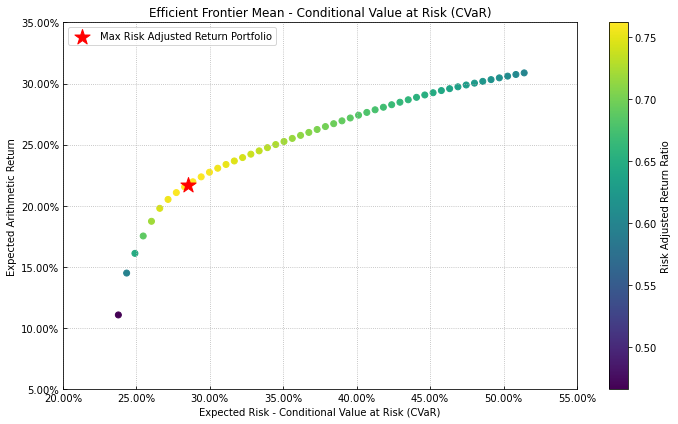

In [20]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)
                      

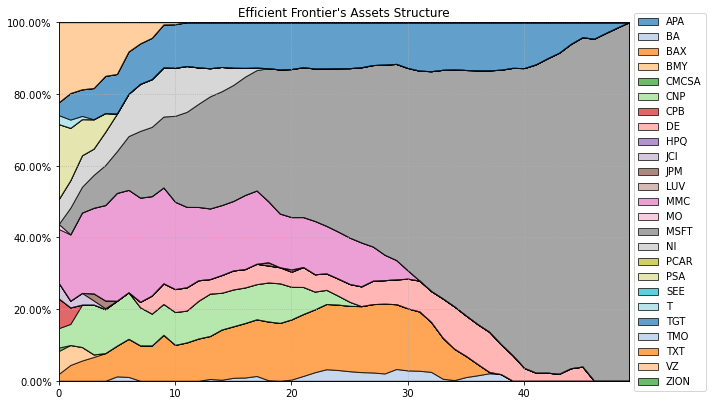

In [21]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [ ]:

# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [ ]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

In [ ]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)